# Take a look at the dataset and how we preprocess it

In [1]:
import datasets
import librosa
import numpy as np
from constants import *
from visualization import *
import preprocessing
from librosa.display import waveplot
from IPython.display import Audio
import matplotlib.pyplot as plt

Take a random song.

In [ ]:
dataset = datasets.GTZAN()

In [2]:
dataset = datasets.BALLROOM()

In [9]:
i = np.random.randint(dataset.nb_files)
print(dataset.filename(i))

Albums-StrictlyDancing_Tango-08


Listen to the song with its beat track.

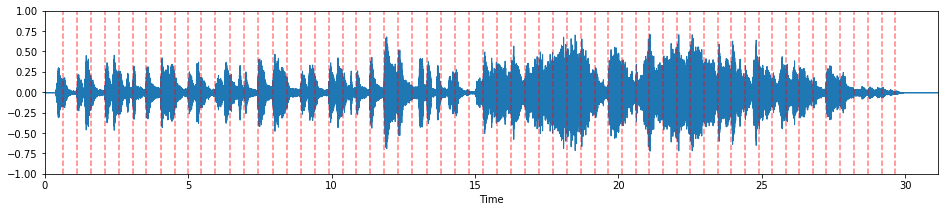

In [10]:
wav = librosa.load(dataset.wav_file(i), sr)[0]
beats = dataset.load_beats(dataset.annotation_file(i))
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
clicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + clicks, rate=sr)

Show the spectrogram.

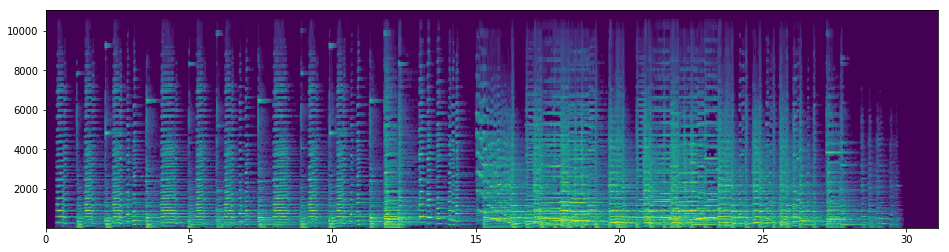

In [11]:
spec = preprocessing.get_spec(librosa.load(dataset.wav_file(i), sr)[0])
showspec(spec)

See the onsets and the one we select according to the beat track.

In [12]:
onsets, isbeat = preprocessing.get_onsets_from_beats(spec, beats)

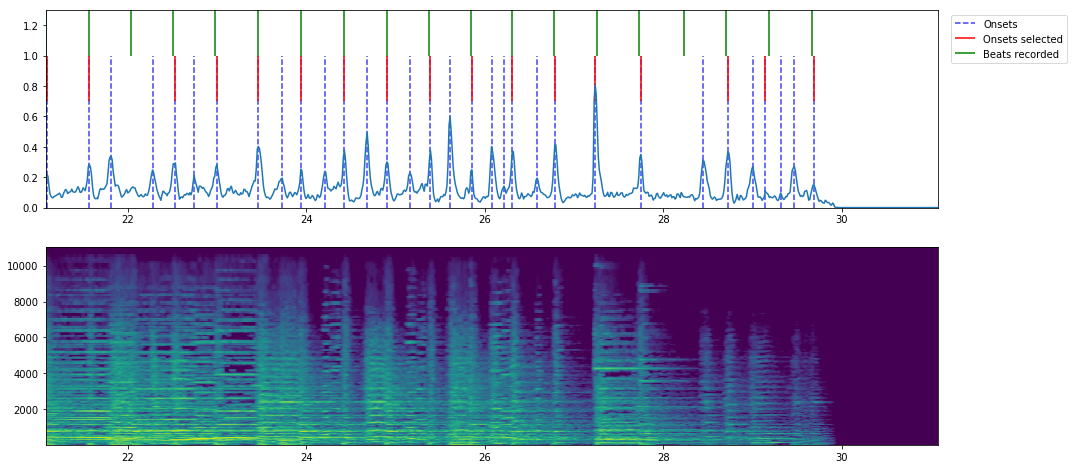

In [13]:
showdata(spec, onsets, isbeat, beats)

# Precompute all spectrograms and onsets data

In [49]:
dataset = datasets.GTZAN()

In [ ]:
dataset.precompute()

In [33]:
dataset = datasets.BALLROOM()

In [15]:
dataset.precompute()

  0.05% | Media-103515.0
  0.10% | Media-103515.1
  0.14% | Media-103515.2
  0.19% | Media-103516.0
  0.24% | Media-103516.1
  0.29% | Media-103516.2
  0.33% | Media-103517.0
  0.38% | Media-103517.1
  0.43% | Media-103517.2
  0.48% | Media-103611.0
  0.53% | Media-103611.1
  0.57% | Media-103611.2
  0.62% | Media-103612.0
  0.67% | Media-103612.1
  0.72% | Media-103612.2
  0.76% | Media-103613.0
  0.81% | Media-103613.1
  0.86% | Media-103613.2
  0.91% | Media-103614.0
  0.96% | Media-103614.1
  1.00% | Media-103614.2
  1.05% | Media-103619.0
  1.10% | Media-103619.1
  1.15% | Media-103619.2
  1.19% | Media-103713.0
  1.24% | Media-103713.1
  1.29% | Media-103713.2
  1.34% | Media-103714.0
  1.38% | Media-103714.1
  1.43% | Media-103714.2
  1.48% | Media-103718.0
  1.53% | Media-103718.1
  1.58% | Media-103718.2
  1.62% | Media-103719.0
  1.67% | Media-103719.1
  1.72% | Media-103719.2
  1.77% | Media-103813.0
  1.81% | Media-103813.1
  1.86% | Media-103813.2
  1.91% | Media-103814.0


 13.47% | Media-104317.2
 13.51% | Media-104415.0
 13.56% | Media-104415.1
 13.61% | Media-104415.2
 13.66% | Media-104416.0
 13.71% | Media-104416.1
 13.75% | Media-104416.2
 13.80% | Media-104417.0
 13.85% | Media-104417.1
 13.90% | Media-104417.2
 13.94% | Media-104418.0
 13.99% | Media-104418.1
 14.04% | Media-104418.2
 14.09% | Media-104514.0
 14.14% | Media-104514.1
 14.18% | Media-104514.2
 14.23% | Media-104515.0
 14.28% | Media-104515.1
 14.33% | Media-104515.2
 14.37% | Media-104516.0
 14.42% | Media-104516.1
 14.47% | Media-104516.2
 14.52% | Media-104615.0
 14.57% | Media-104615.1
 14.61% | Media-104615.2
 14.66% | Media-104616.0
 14.71% | Media-104616.1
 14.76% | Media-104616.2
 14.80% | Media-104617.0
 14.85% | Media-104617.1
 14.90% | Media-104617.2
 14.95% | Media-104618.0
 15.00% | Media-104618.1
 15.04% | Media-104618.2
 15.09% | Media-104716.0
 15.14% | Media-104716.1
 15.19% | Media-104716.2
 15.23% | Media-104717.0
 15.28% | Media-104717.1
 15.33% | Media-104717.2


 28.46% | Albums-Ballroom_Magic-06.1
 28.51% | Albums-Ballroom_Magic-06.2
 28.56% | Albums-Ballroom_Magic-07.0
 28.61% | Albums-Ballroom_Magic-07.1
 28.65% | Albums-Ballroom_Magic-07.2
 28.70% | Albums-Ballroom_Magic-08.0
 28.75% | Albums-Ballroom_Magic-08.1
 28.80% | Albums-Ballroom_Magic-08.2
 28.84% | Albums-Chrisanne1-04.0
 28.89% | Albums-Chrisanne1-04.1
 28.94% | Albums-Chrisanne1-04.2
 28.99% | Albums-Chrisanne1-05.0
 29.04% | Albums-Chrisanne1-05.1
 29.08% | Albums-Chrisanne1-05.2
 29.13% | Albums-Chrisanne1-06.0
 29.18% | Albums-Chrisanne1-06.1
 29.23% | Albums-Chrisanne1-06.2
 29.27% | Albums-Chrisanne2-04.0
 29.32% | Albums-Chrisanne2-04.1
 29.37% | Albums-Chrisanne2-04.2
 29.42% | Albums-Chrisanne2-05.0
 29.47% | Albums-Chrisanne2-05.1
 29.51% | Albums-Chrisanne2-05.2
 29.56% | Albums-Chrisanne2-06.0
 29.61% | Albums-Chrisanne2-06.1
 29.66% | Albums-Chrisanne2-06.2
 29.70% | Albums-Chrisanne3-04.0
 29.75% | Albums-Chrisanne3-04.1
 29.80% | Albums-Chrisanne3-04.2
 29.85% | A

 41.45% | Media-105502.0
 41.50% | Media-105502.1
 41.55% | Media-105502.2
 41.60% | Media-105503.0
 41.64% | Media-105503.1
 41.69% | Media-105503.2
 41.74% | Media-105504.0
 41.79% | Media-105504.1
 41.83% | Media-105504.2
 41.88% | Media-105701.0
 41.93% | Media-105701.1
 41.98% | Media-105701.2
 42.02% | Media-105702.0
 42.07% | Media-105702.1
 42.12% | Media-105702.2
 42.17% | Media-105703.0
 42.22% | Media-105703.1
 42.26% | Media-105703.2
 42.31% | Media-105704.0
 42.36% | Media-105704.1
 42.41% | Media-105704.2
 42.45% | Media-105801.0
 42.50% | Media-105801.1
 42.55% | Media-105801.2
 42.60% | Media-105802.0
 42.65% | Media-105802.1
 42.69% | Media-105802.2
 42.74% | Media-105803.0
 42.79% | Media-105803.1
 42.84% | Media-105803.2
 42.88% | Media-105804.0
 42.93% | Media-105804.1
 42.98% | Media-105804.2
 43.03% | Media-105805.0
 43.08% | Media-105805.1
 43.12% | Media-105805.2
 43.17% | Media-105901.0
 43.22% | Media-105901.1
 43.27% | Media-105901.2
 43.31% | Media-105902.0


 55.21% | Media-105710.0
 55.25% | Media-105710.1
 55.30% | Media-105710.2
 55.35% | Media-105809.0
 55.40% | Media-105809.1
 55.44% | Media-105809.2
 55.49% | Media-105810.0
 55.54% | Media-105810.1
 55.59% | Media-105810.2
 55.64% | Media-105811.0
 55.68% | Media-105811.1
 55.73% | Media-105811.2
 55.78% | Media-105812.0
 55.83% | Media-105812.1
 55.87% | Media-105812.2
 55.92% | Media-105907.0
 55.97% | Media-105907.1
 56.02% | Media-105907.2
 56.06% | Albums-Ballroom_Magic-09.0
 56.11% | Albums-Ballroom_Magic-09.1
 56.16% | Albums-Ballroom_Magic-09.2
 56.21% | Albums-Ballroom_Magic-10.0
 56.26% | Albums-Ballroom_Magic-10.1
 56.30% | Albums-Ballroom_Magic-10.2
 56.35% | Albums-Ballroom_Magic-11.0
 56.40% | Albums-Ballroom_Magic-11.1
 56.45% | Albums-Ballroom_Magic-11.2
 56.49% | Albums-Chrisanne1-07.0
 56.54% | Albums-Chrisanne1-07.1
 56.59% | Albums-Chrisanne1-07.2
 56.64% | Albums-Chrisanne1-08.0
 56.69% | Albums-Chrisanne1-08.1
 56.73% | Albums-Chrisanne1-08.2
 56.78% | Albums-Ch

 69.20% | Albums-Macumba-06.2
 69.25% | Albums-Macumba-07.0
 69.29% | Albums-Macumba-07.1
 69.34% | Albums-Macumba-07.2
 69.39% | Albums-Macumba-08.0
 69.44% | Albums-Macumba-08.1
 69.48% | Albums-Macumba-08.2
 69.53% | Albums-Pais_Tropical-01.0
 69.58% | Albums-Pais_Tropical-01.1
 69.63% | Albums-Pais_Tropical-01.2
 69.68% | Albums-Pais_Tropical-02.0
 69.72% | Albums-Pais_Tropical-02.1
 69.77% | Albums-Pais_Tropical-02.2
 69.82% | Albums-Pais_Tropical-03.0
 69.87% | Albums-Pais_Tropical-03.1
 69.91% | Albums-Pais_Tropical-03.2
 69.96% | Albums-Pais_Tropical-04.0
 70.01% | Albums-Pais_Tropical-04.1
 70.06% | Albums-Pais_Tropical-04.2
 70.11% | Albums-Pais_Tropical-08.0
 70.15% | Albums-Pais_Tropical-08.1
 70.20% | Albums-Pais_Tropical-08.2
 70.25% | Albums-I_Like_It2-01.0
 70.30% | Albums-I_Like_It2-01.1
 70.34% | Albums-I_Like_It2-01.2
 70.39% | Albums-I_Like_It2-02.0
 70.44% | Albums-I_Like_It2-02.1
 70.49% | Albums-I_Like_It2-02.2
 70.53% | Media-103401.0
 70.58% | Media-103401.1
 7

 83.52% | Albums-Latin_Jam4-11.2
 83.57% | Albums-Latin_Jam5-02.0
 83.62% | Albums-Latin_Jam5-02.1
 83.67% | Albums-Latin_Jam5-02.2
 83.72% | Albums-Latin_Jam5-07.0
 83.76% | Albums-Latin_Jam5-07.1
 83.81% | Albums-Latin_Jam5-07.2
 83.86% | Albums-Latin_Jam5-11.0
 83.91% | Albums-Latin_Jam5-11.1
 83.95% | Albums-Latin_Jam5-11.2
 84.00% | Albums-Latino_Latino-01.0
 84.05% | Albums-Latino_Latino-01.1
 84.10% | Albums-Latino_Latino-01.2
 84.15% | Albums-Latino_Latino-04.0
 84.19% | Albums-Latino_Latino-04.1
 84.24% | Albums-Latino_Latino-04.2
 84.29% | Albums-Latino_Latino-06.0
 84.34% | Albums-Latino_Latino-06.1
 84.38% | Albums-Latino_Latino-06.2
 84.43% | Albums-Macumba-01.0
 84.48% | Albums-Macumba-01.1
 84.53% | Albums-Macumba-01.2
 84.57% | Albums-Macumba-02.0
 84.62% | Albums-Macumba-02.1
 84.67% | Albums-Macumba-02.2
 84.72% | Albums-Macumba-03.0
 84.77% | Albums-Macumba-03.1
 84.81% | Albums-Macumba-03.2
 84.86% | Albums-Macumba-04.0
 84.91% | Albums-Macumba-04.1
 84.96% | Albums

 95.85% | Media-103710.2
 95.89% | Media-103711.0
 95.94% | Media-103711.1
 95.99% | Media-103711.2
 96.04% | Media-103712.0
 96.08% | Media-103712.1
 96.13% | Media-103712.2
 96.18% | Media-103717.0
 96.23% | Media-103717.1
 96.28% | Media-103717.2
 96.32% | Media-103809.0
 96.37% | Media-103809.1
 96.42% | Media-103809.2
 96.47% | Media-103810.0
 96.51% | Media-103810.1
 96.56% | Media-103810.2
 96.61% | Media-103811.0
 96.66% | Media-103811.1
 96.70% | Media-103811.2
 96.75% | Media-103812.0
 96.80% | Media-103812.1
 96.85% | Media-103812.2
 96.90% | Media-103817.0
 96.94% | Media-103817.1
 96.99% | Media-103817.2
 97.04% | Media-103818.0
 97.09% | Media-103818.1
 97.13% | Media-103818.2
 97.18% | Media-103911.0
 97.23% | Media-103911.1
 97.28% | Media-103911.2
 97.33% | Media-103912.0
 97.37% | Media-103912.1
 97.42% | Media-103912.2
 97.47% | Media-103913.0
 97.52% | Media-103913.1
 97.56% | Media-103913.2
 97.61% | Media-103914.0
 97.66% | Media-103914.1
 97.71% | Media-103914.2


# Verify that the dataset class works well

In [31]:
i = np.random.randint(len(dataset))
print(f'{i}/{len(dataset)}')

1519/3000


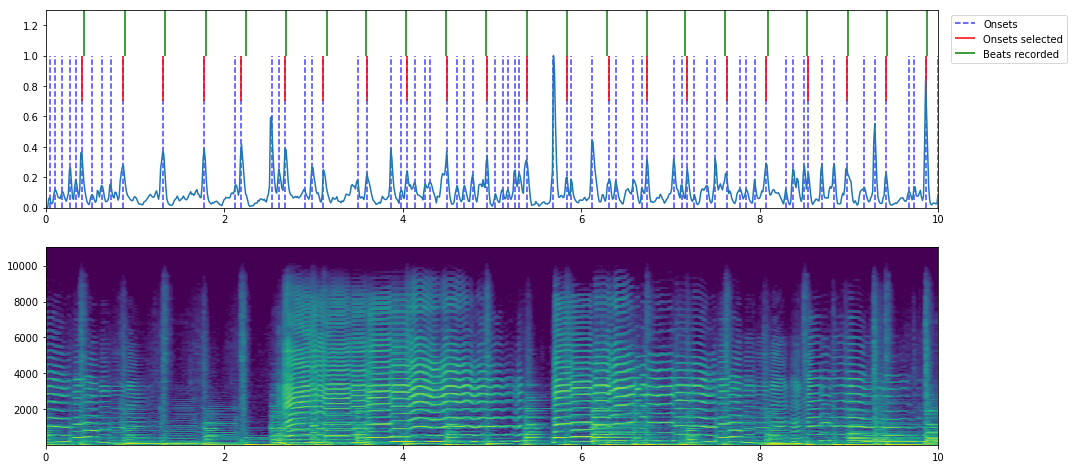

In [32]:
spec, onsets, isbeat = dataset[i]
beats = dataset.get_beats(i)
wav = dataset.get_wav(i)
clicks = librosa.clicks(beats, sr=sr, length=len(wav))
showdata(spec, onsets, isbeat, beats, duration=10, offset=0)
Audio(wav + clicks, rate=sr)

In [34]:
from torch.utils.data import DataLoader

In [50]:
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [51]:
min0 = 10000
min1 = 10000
max0 = 0
max1 = 0
for spec, onsets, isbeat in dataset:
    if spec.shape[0] < min0:
        min0 = spec.shape[0]
    if spec.shape[0] > max0:
        max0 = spec.shape[0]
    if spec.shape[1] < min1:
        min1 = spec.shape[1]
    if spec.shape[1] > max1:
        max1 = spec.shape[1]
    if spec.shape[1] < 862:
        print(spec.shape[1])

861
861
861
861
860
861
861
856
861


In [43]:
librosa.frames_to_time(862, sr, hl)

10.00780045351474

In [44]:
librosa.frames_to_time(806, sr, hl)

9.357641723356009

In [52]:
print(min0, max0, min1, max1)

256 256 856 862


# Test that there is no delay when computing the onsets

In [ ]:
beats = np.arange(0, 5, 0.5, dtype=np.float) + np.random.rand()

In [ ]:
clicks = librosa.clicks(times=beats, sr=sr)

In [ ]:
Audio(clicks, rate=sr)

In [ ]:
librosa.output.write_wav('./tests/test.wav', clicks, sr)

In [ ]:
wav = librosa.load('./tests/test.wav', sr)[0]
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
cclicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + cclicks, rate=sr)

In [ ]:
spec = get_spec('./tests/test.wav')
showspec(spec)

In [ ]:
onsets, isbeat = get_onsets_no_repeat(spec, beats)
showdata(spec, onsets, isbeat, beats)

In [ ]:
onsets_times = librosa.frames_to_time(onsets, sr, hl)

In [ ]:
clickss = librosa.clicks(times=onsets_times, sr=sr, length=len(wav))
Audio(wav + clickss, rate=sr)

In [ ]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(wav + clickss, sr)